In [145]:
# With this code we import numpy and pandas library and we read the file that we have in the same directory. 
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict

dataset = pd.read_csv('Lorenz_data_r22.csv')
data_labels = pd.read_csv('Lorenz_labels_r22.csv')
labels = data_labels.values.ravel()
dataset.columns = ['x','y','z']
data_labels.columns = ['Labels']

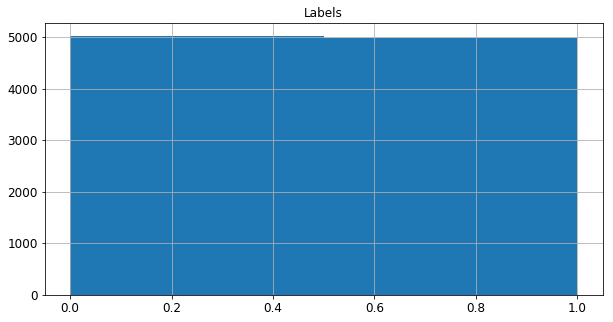

In [14]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_labels.hist(bins=2, figsize=(10,5))
plt.show()

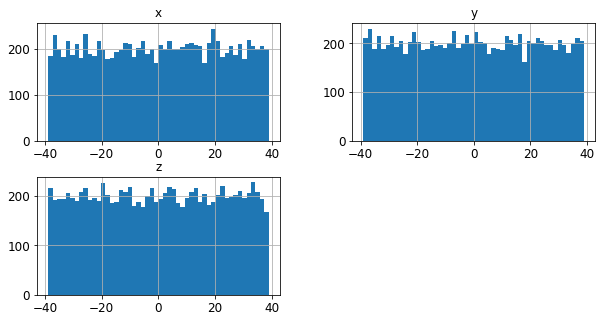

In [15]:
dataset.hist(bins=50, figsize=(10,5))
plt.show()

In [16]:
#Looking for Correlations
corr_matrix = dataset.corr()
corr_matrix

,x,y,z
x,1.000000,-0.017114,0.006618
y,-0.017114,1.000000,0.011754
z,0.006618,0.011754,1.000000


In [146]:
X, y = dataset, labels
X.shape, y.shape


((9999, 3), (9999,))

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(labels, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test = X[:700], X[700:], y[:700], y[700:]
X_train.shape, y_train.shape


((7999, 3), (7999,))

In [148]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
Data_tr = pd.DataFrame(scaling.fit_transform(X_train), columns=X_train.columns)
Data_tr.head()
X_train = Data_tr

Dat_tr = pd.DataFrame(scaling.fit_transform(X_test), columns=X_train.columns)
X_test = Dat_tr

In [20]:
# SGDClassifier

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=10)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
confusion_matrix(y_train, y_train_pred)

array([[2329, 1722],
       [2048, 1900]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred), f1_score(y_train, y_train_pred

0.5245720596355604

In [101]:
# SVM

from sklearn.svm import SVC
svc_clf = SVC(kernel="rbf", gamma = 1, C=50, random_state=42)
svc_clf.fit(X_train, y_train)

SVC(C=50, gamma=1, random_state=42)

In [102]:
y_train_pred = cross_val_predict(svc_clf, X_train, y_train, cv=10)

In [103]:
confusion_matrix(y_train, y_train_pred)

array([[3070,  936],
       [ 944, 3049]], dtype=int64)

In [104]:
precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred), f1_score(y_train, y_train_pred)

(0.7651191969887077, 0.7635862759829702, 0.7643519679117574)

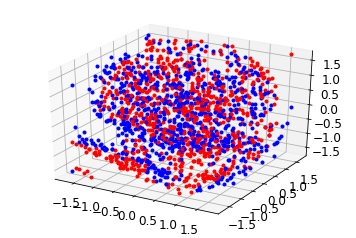

In [136]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ss = svc_clf.predict(X_train)

for i in range(len(ss)):
    if ss[i] != y_train[i]:
        #print(X_train.iloc[[i]])
        if y_train[i] > 0:
         ax.plot(X_train.iloc[[i],0],X_train.iloc[[i],1],X_train.iloc[[i],2],'.b')
        else:
         ax.plot(X_train.iloc[[i],0],X_train.iloc[[i],1],X_train.iloc[[i],2],'.r')
        


In [162]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
xx = np.arange(2,50,1)
yy = np.zeros((50,1))

for i in xx:
 tree_clf = DecisionTreeClassifier(max_depth=i)
 tree_clf.fit(X_train, y_train)
 y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=10)
 yy[i] = f1_score(y_train, y_train_pred)  

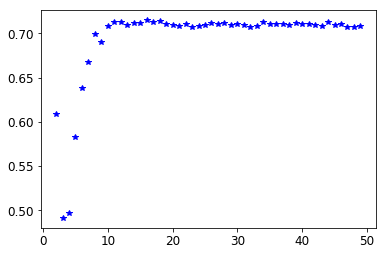

In [163]:
plt.plot(xx,yy[2:],'*b')


In [164]:
tree_clf = DecisionTreeClassifier(max_depth=12)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12)

In [159]:
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=10)

In [160]:
confusion_matrix(y_train, y_train_pred)

array([[2893, 1113],
       [1158, 2835]], dtype=int64)

In [161]:
precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred), f1_score(y_train, y_train_pred)

(0.7180851063829787, 0.709992486851991, 0.7140158670192671)

In [ ]:
s1 = np.

ss = svc_clf.predict(X_train)

In [144]:

s1 = np.arange(-10,10,0.1)
s2 = np.arange(-10,10,0.1)
s3 = np.arange(-10,10,0.1)

fig = plt.figure()
ax = plt.axes(projection='3d')

for i in range(len(s1)):
    for j in range(len(s2)):
        for k in range(len(s3)):
          sss = np.array([s1[i],s2[j],s3[k]])
          s5 = sss.reshape(1,3)
          
          ss = tree_clf.predict(s5)
          
          if ss[0] > 0:
            ax.plot(X_train.iloc[[i],0],X_train.iloc[[j],1],X_train.iloc[[k],2],'.b')
           
          

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000028A57EC4378> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000028A57EBF2F0> (for post_execute):


KeyboardInterrupt: 

In [142]:
s1 = np.arange(1,50,0.1)
s1

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

In [225]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf .fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [226]:

y_train_pred_F = cross_val_predict(forest_clf, X_train, y_train, cv=10)

In [227]:
confusion_matrix(y_train, y_train_pred_F)

array([[3815,  159],
       [ 181, 3844]], dtype=int64)

In [228]:
f1_score(y_train, y_train_pred_F)

0.9576482311908321

In [484]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=10)
log_reg.fit(X, y)

log_reg.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

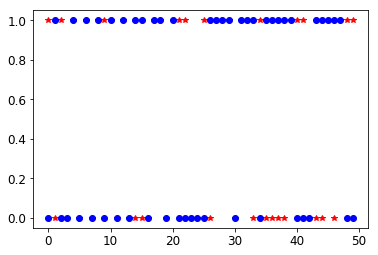

In [361]:
X_train[:50]
XX = np.arange(50)
y_proba = log_reg.predict_proba(X_train)
y_proba_predict = log_reg.predict(X_train[:50])
plt.plot(XX,y_proba_predict,'r*')
plt.plot(XX,y_train[:50],'bo')

In [384]:
from sklearn.model_selection import cross_val_predict
y_train_pred_LG = cross_val_predict(log_reg, X_train, y_train, cv=10)

In [387]:
from sklearn.metrics import f1_score

confusion_matrix(y_train, y_train_pred_LG), f1_score(y_train, y_train_pred_LG), precision_score(y_train, y_train_pred_LG), recall_score(y_train, y_train_pred_LG) 

(array([[2732, 1306],
        [1347, 2614]], dtype=int64),
 0.6633675929450576,
 0.6668367346938775,
 0.6599343600100984)

In [82]:
from sklearn.metrics import mean_squared_error
final_predictions = tree_clf.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.5296225070746144

In [83]:
xx = np.arange(2000)

xx.shape

(2000,)

In [84]:
confusion_matrix(y_test, final_predictions)

array([[735, 271],
       [290, 704]], dtype=int64)

In [85]:
f1 = f1_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)
f1, precision, recall

(0.7150837988826815, 0.7220512820512821, 0.7082494969818913)

(0.9689621726479146, 0.9794117647058823, 0.9587332053742802)

In [305]:
f1_r4 = f1_score(y_test, final_predictions)
precision_r4 = precision_score(y_test, final_predictions)
recall_r4 = recall_score(y_test, final_predictions)
f1_r4, precision_r4, recall_r4

(0.9443892750744787, 0.9491017964071856, 0.9397233201581028)

In [327]:
f1_r6 = f1_score(y_test, final_predictions)
precision_r6 = precision_score(y_test, final_predictions)
recall_r6 = recall_score(y_test, final_predictions)
f1_r6, precision_r6, recall_r6

(0.9375629405840886, 0.9519427402862985, 0.9236111111111112)

In [349]:
f1_r8 = f1_score(y_test, final_predictions)
precision_r8 = precision_score(y_test, final_predictions)
recall_r8 = recall_score(y_test, final_predictions)
f1_r8, precision_r8, recall_r8

(0.9409905163329821, 0.9390115667718192, 0.9429778247096093)

In [370]:
f1_r10 = f1_score(y_test, final_predictions)
precision_r10 = precision_score(y_test, final_predictions)
recall_r10 = recall_score(y_test, final_predictions)
f1_r10, precision_r10, recall_r10

(0.9356664951106537, 0.9429460580912863, 0.9284984678243106)

In [392]:
f1_r12 = f1_score(y_test, final_predictions)
precision_r12 = precision_score(y_test, final_predictions)
recall_r12 = recall_score(y_test, final_predictions)
f1_r12, precision_r12, recall_r12

(0.941356450790413, 0.9486125385405961, 0.9342105263157895)

In [413]:
f1_r14 = f1_score(y_test, final_predictions)
precision_r14 = precision_score(y_test, final_predictions)
recall_r14 = recall_score(y_test, final_predictions)
f1_r14, precision_r14, recall_r14

(0.9611699445284921, 0.9694811800610377, 0.953)

In [496]:
f1_r16 = f1_score(y_test, final_predictions)
precision_r16 = precision_score(y_test, final_predictions)
recall_r16 = recall_score(y_test, final_predictions)
f1_r16, precision_r16, recall_r16

(0.9554896142433235, 0.9554896142433235, 0.9554896142433235)

In [475]:
f1_r18 = f1_score(y_test, final_predictions)
precision_r18 = precision_score(y_test, final_predictions)
recall_r18 = recall_score(y_test, final_predictions)
f1_r18, precision_r18, recall_r18

(0.9303703703703704, 0.9172346640701071, 0.9438877755511023)

In [454]:
f1_r20 = f1_score(y_test, final_predictions)
precision_r20 = precision_score(y_test, final_predictions)
recall_r20 = recall_score(y_test, final_predictions)
f1_r20, precision_r20, recall_r20

(0.8813056379821959, 0.8936810431293881, 0.8692682926829268)

In [434]:
f1_r22 = f1_score(y_test, final_predictions)
precision_r22 = precision_score(y_test, final_predictions)
recall_r22 = recall_score(y_test, final_predictions)
f1_r22, precision_r22, recall_r22

(0.810272536687631, 0.8010362694300518, 0.8197242841993637)

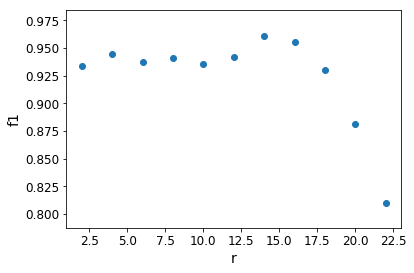

In [504]:
xx = np.array([f1_r2,f1_r4,f1_r6,f1_r8,f1_r10,f1_r12,f1_r14,f1_r16,f1_r18,f1_r20,f1_r22])
yy = np.array([2,4,6,8,10,12,14,16,18,20,22])
plt.scatter(yy,xx)
plt.xlabel('r')
plt.ylabel('f1');
# std = 10

In [526]:
f1_r18_st10 =f1_r18
precision_r18_st10 = precision_r18
recall_r18_st10 = recall_r18
f1_r18_st10, precision_r18_st10, recall_r18_st10

(0.9303703703703704, 0.9172346640701071, 0.9438877755511023)

In [525]:
f1_r18_st20 = f1_score(y_test, final_predictions)
precision_r18_st20 = precision_score(y_test, final_predictions)
recall_r18_st20 = recall_score(y_test, final_predictions)
f1_r18_st20, precision_r18_st20, recall_r18_st20

(0.9025590551181101, 0.9097222222222222, 0.8955078125)

In [546]:
f1_r18_st30 = f1_score(y_test, final_predictions)
precision_r18_st30 = precision_score(y_test, final_predictions)
recall_r18_st30 = recall_score(y_test, final_predictions)
f1_r18_st30, precision_r18_st30, recall_r18_st30

(0.8781234064252932, 0.8785714285714286, 0.8776758409785933)

In [567]:
f1_r18_st40 = f1_score(y_test, final_predictions)
precision_r18_st40 = precision_score(y_test, final_predictions)
recall_r18_st40 = recall_score(y_test, final_predictions)
f1_r18_st40, precision_r18_st40, recall_r18_st40

(0.8465712876171683, 0.8469891411648569, 0.8461538461538461)

In [588]:
f1_r18_st50 = f1_score(y_test, final_predictions)
precision_r18_st50 = precision_score(y_test, final_predictions)
recall_r18_st50 = recall_score(y_test, final_predictions)
f1_r18_st50, precision_r18_st50, recall_r18_st50

(0.8141414141414142, 0.8266666666666667, 0.8019900497512438)

In [607]:
f1_r18_st60 = f1_score(y_test, final_predictions)
precision_r18_st60 = precision_score(y_test, final_predictions)
recall_r18_st60 = recall_score(y_test, final_predictions)
f1_r18_st60, precision_r18_st60, recall_r18_st60

(0.7640562248995985, 0.7757390417940877, 0.7527200791295747)

In [656]:
f1_r18_st70 = f1_score(y_test, final_predictions)
precision_r18_st70 = precision_score(y_test, final_predictions)
recall_r18_st70 = recall_score(y_test, final_predictions)
f1_r18_st70, precision_r18_st70, recall_r18_st70

(0.7614631633178774, 0.7730125523012552, 0.750253807106599)

In [646]:
f1_r18_st80 = f1_score(y_test, final_predictions)
precision_r18_st80 = precision_score(y_test, final_predictions)
recall_r18_st80 = recall_score(y_test, final_predictions)
f1_r18_st80, precision_r18_st80, recall_r18_st80

(0.7053291536050157, 0.7038581856100105, 0.7068062827225131)

In [674]:
f1_r18_st90 = f1_score(y_test, final_predictions)
precision_r18_st90 = precision_score(y_test, final_predictions)
recall_r18_st90 = recall_score(y_test, final_predictions)
f1_r18_st90, precision_r18_st90, recall_r18_st90

(0.7001034126163392, 0.7248394004282656, 0.677)

In [692]:
f1_r18_st100 = f1_score(y_test, final_predictions)
precision_r18_st100 = precision_score(y_test, final_predictions)
recall_r18_st100 = recall_score(y_test, final_predictions)
f1_r18_st100, precision_r18_st100, recall_r18_st100

(0.6539480657127715, 0.6787678767876788, 0.630879345603272)

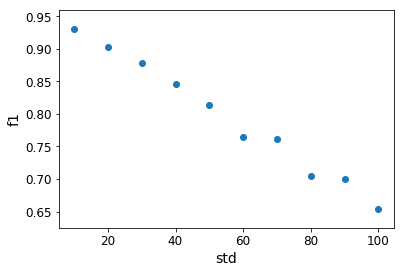

In [693]:
xxs = np.array([f1_r18_st10,f1_r18_st20,f1_r18_st30,f1_r18_st40,f1_r18_st50,f1_r18_st60,f1_r18_st70,f1_r18_st80,f1_r18_st90,f1_r18_st100])
yys = np.array([10,20,30,40,50,60,70,80,90,100])
plt.scatter(yys,xxs)
plt.xlabel('std')
plt.ylabel('f1');
# r = 18

In [697]:
some_digit = X[6000:]
y_scores = sgd_clf.decision_function([some_digit])
y_scores


ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
plt.plot(fpr, tpr, linewidth=2, label=label)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

In [113]:
ab = ['2','4','6','8','10','12','14','16','18','20','22']
for i in ab:
    print(i)

2
4
6
8
10
12
14
16
18
20
22
